In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls         #checking file

sample_data/  UpdatedResumeDataSet.csv


In [3]:
#upload the data and store in a variable
data= pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [4]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
#finding data shape
data.shape

(962, 2)

In [6]:
#checking duplicate values
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:

#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


**1. Train test split**

In [8]:
#After the train test split concatenate the data and perform all the operations in both train and test data

In [9]:
#copy original data into other variable first
data1= data.copy()

In [10]:
data1.head(2)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...


In [11]:
x=data.iloc[0:,-1]      #extract independent varialbe and store in a variable x
y=data.iloc[0:,0]         #extract dependent variable and store in a variable y


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.33, random_state=42)      #splitting the data, test size means how much I keep for testing, useing random state so that data did not change when I

In [13]:
#checking the length
len(x_train)  , len(y_train),len(x_test)  , len(y_test)

(644, 644, 318, 318)

In [14]:
training_data= pd.concat([x_train, y_train],axis=1)      #concat x trainand y train and adding to a new variable
training_data.head(2)                              #checking first 2 rows

,Resume,Category
181,Education Details \r\n B.C.A Bachelor Computer...,Web Designing
274,SKILLS: Computer: â¢ Can easily operate in Op...,Health and fitness


In [15]:
testing_data= pd.concat([x_test, y_test],axis=1)          #concat x test and y teest and add to a new variable
testing_data.head(2)                                            #checking first 2 rows

,Resume,Category
344,TECHNICAL SKILLS Programming Languages: Java (...,Java Developer
381,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",Java Developer


2. **EDA**
**---Performing EDA on traiing data**

In [16]:
training_data.head(2)

,Resume,Category
181,Education Details \r\n B.C.A Bachelor Computer...,Web Designing
274,SKILLS: Computer: â¢ Can easily operate in Op...,Health and fitness


In [17]:
training_data["Category"].unique()

array(['Web Designing', 'Health and fitness', 'Blockchain', 'HR', 'Arts',
       'Civil Engineer', 'Java Developer', 'ETL Developer',
       'Data Science', 'Operations Manager', 'Mechanical Engineer',
       'Network Security Engineer', 'Database', 'Electrical Engineering',
       'DevOps Engineer', 'PMO', 'Sales', 'Hadoop', 'DotNet Developer',
       'Automation Testing', 'Testing', 'Python Developer',
       'Business Analyst', 'SAP Developer', 'Advocate'], dtype=object)

In [18]:
training_data["Category"].value_counts()

Java Developer               54
Testing                      43
Web Designing                37
DevOps Engineer              34
Python Developer             32
Hadoop                       32
ETL Developer                31
Blockchain                   28
Data Science                 28
Sales                        28
Mechanical Engineer          27
HR                           26
Arts                         26
Database                     24
Operations Manager           22
PMO                          21
Electrical Engineering       20
Health and fitness           20
Network Security Engineer    19
Automation Testing           19
Business Analyst             19
DotNet Developer             17
SAP Developer                14
Advocate                     13
Civil Engineer               10
Name: Category, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

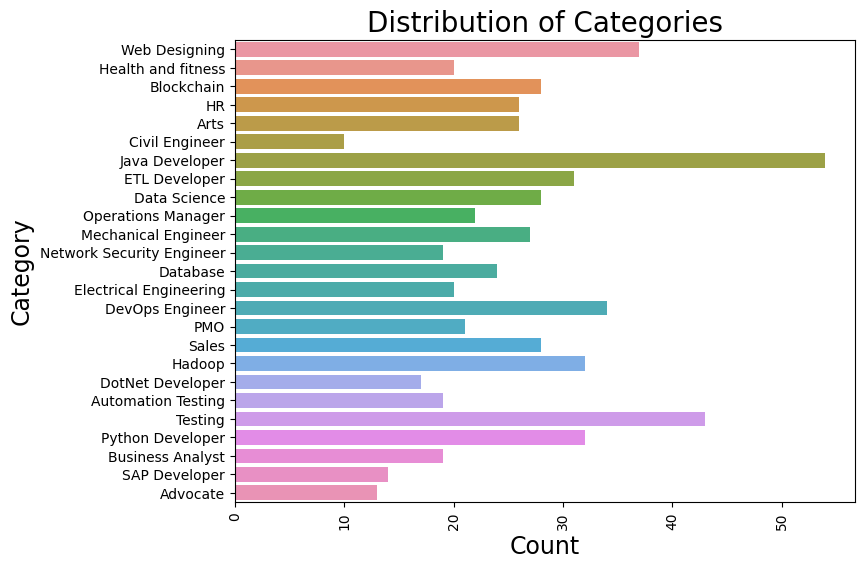

In [19]:
#let's Visalize
import seaborn as sns
plt.figure(figsize = (8,6))
plt.xticks(rotation = 90)
sns.countplot(y="Category",data = training_data)
plt.title("Distribution of Categories", fontsize= 20)
plt.xlabel("Count", fontsize=17)
plt.ylabel("Category", fontsize=17)
plt.show

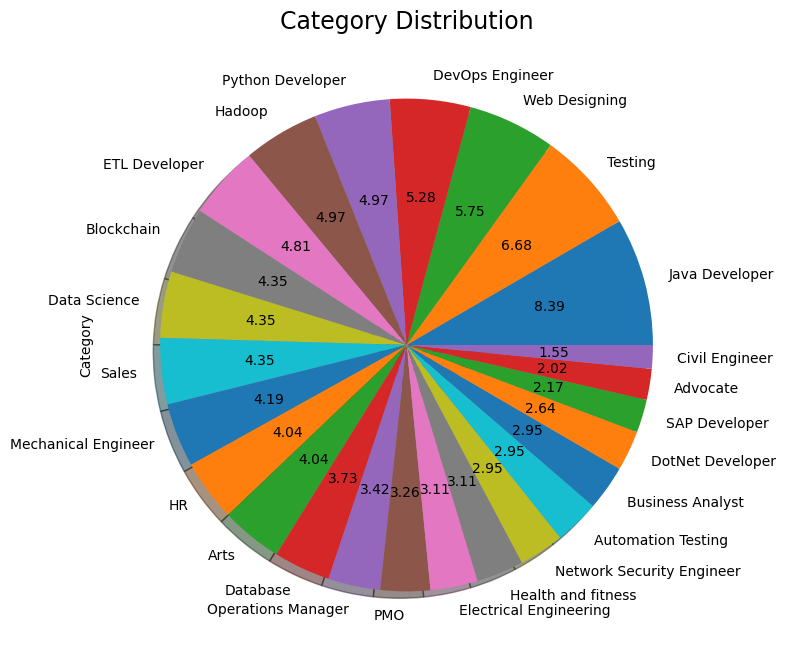

In [20]:
#visualize through pie plot, so we excatly see the percentages
plt.figure(figsize = (8,8))
training_data["Category"].value_counts().plot(kind="pie", autopct="%0.2f", shadow=True)
plt.title("Category Distribution", fontsize=17)
plt.show()

**3. Text Preprocessing**

**-----------Doing Text preprocessing in both Training and testing data**

In [21]:
#Training Data
training_data.head()

,Resume,Category
181,Education Details \r\n B.C.A Bachelor Computer...,Web Designing
274,SKILLS: Computer: â¢ Can easily operate in Op...,Health and fitness
859,"KEY SKILLS: Programing languages: C, C++, Pyth...",Blockchain
69,KEY SKILLS: â¢ Computerized accounting with t...,HR
291,Personal Skills: â¢ Good verbal and written c...,Health and fitness


In [22]:
training_data["Resume"][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

In [23]:
training_data["Resume"][640]

"Software Proficiency: â\x80¢ Languages: Basics of C, SQL, PL/SQL,JAVA,JAVAEE,Javascript,HTML,CSS,jquery,mysql,Spring ,Hibernate. â\x80¢ Software Tools: Xillinx, Modelsim, Matlab, Multisim. â\x80¢ Operating Systems: Windows XP, Vista, 07, 08, Ubuntu. Project Profile: B.E. Project FPGA Implementation of Team Size: 4. Role: Programmer. AES Algorithm AES is Advanced Encryption Standard which is used in cryptography by which we can protect our data. It encrypted by a Secret Key. T.E. project Sorting Robot. Team Size: 3. Role: Mechanism designer. The TCS 230 sensor sorts the RGB color balls according to their color. Diploma Project RFID Based Student Team Size: 4. Role: Interface. Attendance System Using GSM. In this student show RFID card of his own and then message send via GSM to their parent that his ward is present.Education Details \r\nMay 2016 B.E. Savitribai Phule Pune, Maharashtra Pune University\r\nMarch 2010 S.S.C   Maharashtra Board\r\nDevOps Engineer \r\n\r\n\r\nSkill Details \

In [24]:
training_data.shape

(644, 2)

In [25]:
#In Text preprocessing we do---
#revome URls, hastags, mentions, RT\CC, resume text and whitespace with the help of refunction
#change the string into lowercase
# tokenize the string
#remove special character
# remove punctuations marks
# remove stopwords
# apply stemming with the help of nltk library

In [26]:
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus.reader.tagged import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [110]:
def text_preprocess(text):
  text = re.sub('http\S+\s*', ' ', text)  # remove URLs
  text = re.sub('RT|cc', ' ', text)  # remove RT and cc
  text = re.sub('#\S+', '', text)  # remove hashtags
  text = re.sub('@\S+', '  ', text)  # remove mentions
    #resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
  text = re.sub(r'[^\x00-\x7f]',r' ', text)
  text = re.sub('\s+', ' ', text)  # remove extra whitespace

  text= text.lower()         #converting the text into lowercase
  text= nltk.word_tokenize(text)            #tokenize the text into words

  y=[]                      #creating a blank list
  for i in text:                  #iteratre each word with the help of for loop
    if i.isalnum():                    #if the number was alphanumeric(either string or number)
      y.append(i)              #appending that on blank list

  text= y[:]                #saving y into text
  y.clear()                #clearing list y

  for i in text:                       #iterate each word into text
    if i not in stopwords.words("english") and i not in string.punctuation:  #removing stopword and punctuation
      y.append(i)              #appenting it into y

  text= y[:]
  y.clear()

  for i in text:
   y.append(ps.stem(i))                     #apply stem function

  return " ".join(y)            #join all the tokenized words



In [28]:
training_data['New_Resume']= training_data["Resume"].apply(text_preprocess)       #apply the function

In [29]:
training_data.head(6)

,Resume,Category,New_Resume
181,Education Details \r\n B.C.A Bachelor Computer...,Web Designing,educ detail bachelor comput applic pune mahara...
274,SKILLS: Computer: â¢ Can easily operate in Op...,Health and fitness,skill comput easili oper oper system like wind...
859,"KEY SKILLS: Programing languages: C, C++, Pyth...",Blockchain,key skill program languag c python apex visual...
69,KEY SKILLS: â¢ Computerized accounting with t...,HR,key skill computer ount talli sincer hard work...
291,Personal Skills: â¢ Good verbal and written c...,Health and fitness,person skill good verbal written commun skill ...
131,Education Details \r\nJanuary 2017 Rachana ...,Arts,educ detail januari 2017 rachana sansad school...


In [30]:
training_data["New_Resume"][567]      #here we see that our training data was clear

'train attend su ess complet esd program conduct zensar technolog pune 2017 su ess complet employ train conduct barclay global talent track nasscom foundat achiev treasur ieee student branch jscoe pune work team leader colleg variou technic cultur event 2016 2017 project idea got select final prototyp round 2018 pune particip avishkar 2017 conduct savitribai phule pune univers project idea submit entur innov 2018 pune brought sponsorship rs platinum auto formerli royal enfield 2017 pune secur 1 st rank colleg level competit poster present smart ambul 2017 pune organ ieee workshop excel english public speak 2017 pune workshop attend su ess complet 4 day workshop medic iot conduct ieee standard associ vip 2017 pune su ess complet 2 day workshop introduct arduino scoe 2016 pune su ess complet 3 day workshop robot junior conduct comput societi india skncoe 2016 pune particip variou technic competit scoe pict aissm pune educ detail june 2018 bachelor engin comput pune maharashtra savitribai

In [31]:
#dropping the resume column
training_data= training_data.drop(["Resume"], axis=1)


In [32]:
training_data.head()

,Category,New_Resume
181,Web Designing,educ detail bachelor comput applic pune mahara...
274,Health and fitness,skill comput easili oper oper system like wind...
859,Blockchain,key skill program languag c python apex visual...
69,HR,key skill computer ount talli sincer hard work...
291,Health and fitness,person skill good verbal written commun skill ...


In [33]:
#Testing data
#apply the same function on test data
testing_data.head()

,Resume,Category
344,TECHNICAL SKILLS Programming Languages: Java (...,Java Developer
381,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",Java Developer
351,Education Details \r\nJanuary 2013 Master of E...,Java Developer
778,"Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo...",Hadoop
277,Education Details \r\nJanuary 1992 to January ...,Health and fitness


In [34]:
testing_data.shape

(318, 2)

In [35]:
testing_data["Resume"][344]

"TECHNICAL SKILLS Programming Languages: Java (Servlet, JSP, Spring Boot). Web Technology: HTML5, CSS3, Bootstrap, JavaScript, JQuery, Ajax, AngularJs. Database: MySQL. IDE and Tool: Eclipse, spring tool Suit, Net beans, Sublime Text, Atom. Operating System: Windows XP, 7, 8, 10. ACHIEVEMENT â\x80¢ Java Developer Certificate from Unanth Technical Institute. â\x80¢ Java Certificate from solo Learn. â\x80¢ Command line crash Course certificate from Udemy. JOB DETAILS Education Details \r\nJanuary 2018 M.C.A  Pune, Maharashtra Pune University\r\nJanuary 2015 B.C.A  Amravati, Maharashtra Amravati University\r\nJanuary 2012 H.S.C  Amravati, Maharashtra Amravati University\r\nJanuary 2010 S.S.C  Amravati, Maharashtra Amravati University\r\nJava developer \r\n\r\nFull Stack Java Developer\r\nSkill Details \r\nCss- Exprience - Less than 1 year months\r\nAjax- Exprience - Less than 1 year months\r\nServlet- Exprience - Less than 1 year months\r\nHtml5- Exprience - Less than 1 year months\r\nSpr

In [36]:
testing_data['New_Resume']= testing_data["Resume"].apply(text_preprocess)       #apply the function

In [37]:
testing_data.head()

,Resume,Category,New_Resume
344,TECHNICAL SKILLS Programming Languages: Java (...,Java Developer,technic skill program languag java servlet jsp...
381,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",Java Developer,technicalskil springmvc hibern jdbc java j2ee ...
351,Education Details \r\nJanuary 2013 Master of E...,Java Developer,educ detail januari 2013 master engin inform t...
778,"Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo...",Hadoop,skill set hadoop map reduc hdf hive sqoop java...
277,Education Details \r\nJanuary 1992 to January ...,Health and fitness,educ detail januari 1992 januari 2003 first ye...


In [38]:
#checking after applying function

In [39]:
testing_data["New_Resume"][344]

'technic skill program languag java servlet jsp spring boot web technolog html5 css3 bootstrap javascript jqueri ajax angularj databas mysql ide tool eclips spring tool suit net bean sublim text atom oper system window xp 7 8 achiev java develop certif unanth technic institut java certif solo learn command line crash cours certif udemi job detail educ detail januari 2018 pune maharashtra pune univers januari 2015 amravati maharashtra amravati univers januari 2012 amravati maharashtra amravati univers januari 2010 amravati maharashtra amravati univers java develop full stack java develop skill detail exprienc less 1 year month exprienc less 1 year month exprienc less 1 year month exprienc less 1 year month exprienc less 1 year month exprienc less 1 year month exprienc less 1 year month exprienc less 1 year month exprienc less 1 year month exprienc less 1 year month spring exprienc less 1 year monthscompani detail compani salclust technolog descript work java develop develop 3 project us

In [40]:
#remove resume column from the test data
testing_data= testing_data.drop(["Resume"], axis=1)


In [41]:
testing_data.head()

,Category,New_Resume
344,Java Developer,technic skill program languag java servlet jsp...
381,Java Developer,technicalskil springmvc hibern jdbc java j2ee ...
351,Java Developer,educ detail januari 2013 master engin inform t...
778,Hadoop,skill set hadoop map reduc hdf hive sqoop java...
277,Health and fitness,educ detail januari 1992 januari 2003 first ye...


In [42]:
#text preprocessing was completed in both train and test data

**Finding most common word in training data**

In [43]:
#extract words, so that we find a most common word
sentences= ""                 #creating a blank string
total_words = []                 #creating a blank list

for i in training_data['New_Resume']:         #using for loop in which i iterate each sentence in new resume column
    words = nltk.word_tokenize(i)              #tokenize that sentence into words and store it into a new variable
    for j in words:                             # j iterate each word using for loop
        total_words.append(j)                    # add these words into our blank list
    sentences += i                                #add that sentence into our blank list and increase the value of i



In [44]:
len(total_words)      #checking the length of total words

198445

In [45]:
new= nltk.FreqDist(total_words)              #frequency distribution counts the number of times that each word occurs and stored in a new variable
most_common_words = new.most_common(100)      #finding most common 100 words
common_words= pd.DataFrame(most_common_words)   #creating a dataframe
common_words

,0,1
0,exprienc,2718
1,project,2622
2,compani,2413
3,manag,2395
4,month,2387
...,...,...
95,build,355
96,gener,353
97,etc,352
98,involv,347


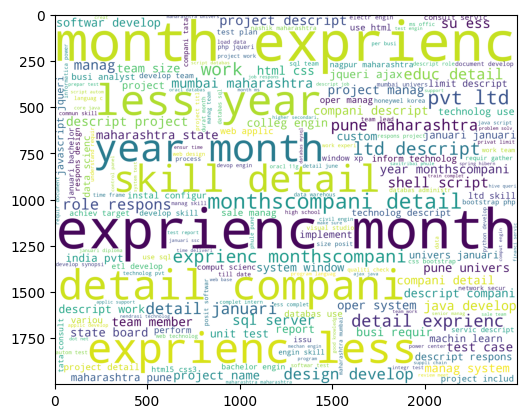

In [46]:
#lets visualize it using wordcloud
#importing library
from wordcloud import WordCloud
wc=WordCloud(width=2500, height=2000, min_font_size=15, background_color= 'white')
common= wc.generate(sentences)
plt.imshow(common)
plt.show()

**4. Converting categorical target varialable (Category) into numerical using lable encoding**

-----------Training data

In [47]:
training_data.head()

,Category,New_Resume
181,Web Designing,educ detail bachelor comput applic pune mahara...
274,Health and fitness,skill comput easili oper oper system like wind...
859,Blockchain,key skill program languag c python apex visual...
69,HR,key skill computer ount talli sincer hard work...
291,Health and fitness,person skill good verbal written commun skill ...


In [48]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
training_data["Category"]=le.fit_transform(training_data["Category"])        #fit and tranform the data and store it, in a same variable

In [49]:
training_data.head()         #checking first 5rows

,Category,New_Resume
181,24,educ detail bachelor comput applic pune mahara...
274,14,skill comput easili oper oper system like wind...
859,3,key skill program languag c python apex visual...
69,12,key skill computer ount talli sincer hard work...
291,14,person skill good verbal written commun skill ...


In [50]:
training_data["Category"].unique()

array([24, 14,  3, 12,  1,  5, 15, 10,  6, 18, 16, 17,  7, 11,  8, 19, 22,
       13,  9,  2, 23, 20,  4, 21,  0])

--------Test Data

In [51]:
testing_data.head()

,Category,New_Resume
344,Java Developer,technic skill program languag java servlet jsp...
381,Java Developer,technicalskil springmvc hibern jdbc java j2ee ...
351,Java Developer,educ detail januari 2013 master engin inform t...
778,Hadoop,skill set hadoop map reduc hdf hive sqoop java...
277,Health and fitness,educ detail januari 1992 januari 2003 first ye...


In [52]:
testing_data["Category"]=le.transform(testing_data["Category"])        # tranform the data and store it, in a same variable

In [53]:
testing_data.head()

,Category,New_Resume
344,15,technic skill program languag java servlet jsp...
381,15,technicalskil springmvc hibern jdbc java j2ee ...
351,15,educ detail januari 2013 master engin inform t...
778,13,skill set hadoop map reduc hdf hive sqoop java...
277,14,educ detail januari 1992 januari 2003 first ye...


**5. Converting new resume column into numbers using vectorizer**

-------------Training data

In [54]:
training_data.head(2)

,Category,New_Resume
181,24,educ detail bachelor comput applic pune mahara...
274,14,skill comput easili oper oper system like wind...


In [55]:
#importing library
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()#(max_features=4000)
X_train_final= cv.fit_transform(training_data["New_Resume"]).toarray()         #by default it will return a scipy sparse matrix so using toarray() function to convert matrix into numpyarray

In [56]:
X_train_final.shape

(644, 5187)

In [57]:
X_train_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
y_train_final= training_data["Category"].values

In [59]:
y_train_final.shape

(644,)

----------Test Data

In [60]:
testing_data.head(2)

,Category,New_Resume
344,15,technic skill program languag java servlet jsp...
381,15,technicalskil springmvc hibern jdbc java j2ee ...


In [61]:
X_test_final= cv.transform(testing_data["New_Resume"]).toarray()         #by default it will return a scipy sparse matrix so using toarray() function to convert matrix into numpyarray

In [62]:
X_test_final.shape

(318, 5187)

In [63]:
y_test_final= testing_data["Category"].values
y_test_final.shape

(318,)

**6. Model Development**

In [64]:
#importing all the algorithm that I am using
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
#creating an object
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb=GaussianNB()
bnb= BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=4)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [66]:
#creating an dictonary, keys hold the algorithm name and values hold an algorithm object
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'MNB_NB': mnb,
    'GNB_NB': gnb,
    'BNB_NB':bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,

}

In [67]:
#creating an function, in which we predict values and find accuracy and precision score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = accuracy_score(y_test,y_pred)

    return accuracy,precision

In [68]:
accuracy_scores = []          #creating a blank list to add all the accuracy score
precision_scores = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():
    current_accuracy, current_precision= train_classifier(clf, X_train_final,y_train_final,X_test_final,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For  SVC
Accuracy -  0.09433962264150944
Precision -  0.09433962264150944

For  KN
Accuracy -  0.9213836477987422
Precision -  0.9213836477987422

For  MNB_NB
Accuracy -  0.9874213836477987
Precision -  0.9874213836477987

For  GNB_NB
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497

For  BNB_NB
Accuracy -  0.7421383647798742
Precision -  0.7421383647798742

For  DT
Accuracy -  0.29874213836477986
Precision -  0.29874213836477986


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For  LR
Accuracy -  0.9905660377358491
Precision -  0.9905660377358491

For  RF
Accuracy -  0.9905660377358491
Precision -  0.9905660377358491


In [69]:
algo_performance= pd.DataFrame({"Algorithm":clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
algo_performance

,Algorithm,Accuracy,Precision
0,SVC,0.094340,0.094340
1,KN,0.921384,0.921384
2,MNB_NB,0.987421,0.987421
3,GNB_NB,0.996855,0.996855
4,BNB_NB,0.742138,0.742138
5,DT,0.298742,0.298742
6,LR,0.990566,0.990566
7,RF,0.990566,0.990566


**Using onevsrest**

In [70]:
#creating an object
from sklearn.multiclass import OneVsRestClassifier
svc1 = OneVsRestClassifier(SVC(kernel='sigmoid', gamma=1.0))
knc1 = OneVsRestClassifier(KNeighborsClassifier())
mnb1 = OneVsRestClassifier(MultinomialNB())
gnb1=OneVsRestClassifier(GaussianNB())
bnb1= OneVsRestClassifier(BernoulliNB())
dtc1 = OneVsRestClassifier(DecisionTreeClassifier(max_depth=4))
lrc1 = OneVsRestClassifier(LogisticRegression())
rfc1 = OneVsRestClassifier(RandomForestClassifier(n_estimators=50, random_state=2))

In [71]:
#creating an dictonary, keys hold the algorithm name and values hold an algorithm object
clfs1 = {
    'SVC' : svc1,
    'KN' : knc1,
    'MNB_NB': mnb1,
    'GNB_NB': gnb1,
    'BNB_NB':bnb1,
    'DT': dtc1,
    'LR': lrc1,
    'RF': rfc1,

}

In [72]:
accuracy_scores1 = []          #creating a blank list to add all the accuracy score
precision_scores1 = []          #creating a blank list to add all the precision score

for name,clf1 in clfs1.items():

    current_accuracy1,current_precision1 = train_classifier(clf1, X_train_final,y_train_final,X_test_final,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy1)
    print("Precision - ",current_precision1)

    accuracy_scores1.append(current_accuracy1)
    precision_scores1.append(current_precision1)


For  SVC
Accuracy -  0.0440251572327044
Precision -  0.0440251572327044

For  KN
Accuracy -  0.9213836477987422
Precision -  0.9213836477987422

For  MNB_NB
Accuracy -  0.9842767295597484
Precision -  0.9842767295597484

For  GNB_NB
Accuracy -  0.9937106918238994
Precision -  0.9937106918238994

For  BNB_NB
Accuracy -  0.720125786163522
Precision -  0.720125786163522

For  DT
Accuracy -  0.9937106918238994
Precision -  0.9937106918238994

For  LR
Accuracy -  0.9905660377358491
Precision -  0.9905660377358491

For  RF
Accuracy -  0.9874213836477987
Precision -  0.9874213836477987


In [73]:
algo_performance1= pd.DataFrame({"Algorithm":clfs1.keys(),'OnevsrestAccuracy':accuracy_scores1,'OnevsrestPrecision':precision_scores1})
algo_performance1

,Algorithm,OnevsrestAccuracy,OnevsrestPrecision
0,SVC,0.044025,0.044025
1,KN,0.921384,0.921384
2,MNB_NB,0.984277,0.984277
3,GNB_NB,0.993711,0.993711
4,BNB_NB,0.720126,0.720126
5,DT,0.993711,0.993711
6,LR,0.990566,0.990566
7,RF,0.987421,0.987421


In [74]:
#creating another variable and merge this result into previous one for comparison
algo_performance3 =algo_performance.merge(algo_performance1, on="Algorithm")
algo_performance3

,Algorithm,Accuracy,Precision,OnevsrestAccuracy,OnevsrestPrecision
0,SVC,0.094340,0.094340,0.044025,0.044025
1,KN,0.921384,0.921384,0.921384,0.921384
2,MNB_NB,0.987421,0.987421,0.984277,0.984277
3,GNB_NB,0.996855,0.996855,0.993711,0.993711
4,BNB_NB,0.742138,0.742138,0.720126,0.720126
5,DT,0.298742,0.298742,0.993711,0.993711
6,LR,0.990566,0.990566,0.990566,0.990566
7,RF,0.990566,0.990566,0.987421,0.987421


In [75]:
#there is no benfit of using onevsrest

**Using Onevsone**

In [76]:
#creating an object
from sklearn.multiclass import OneVsOneClassifier
svc2 = OneVsOneClassifier(SVC(kernel='sigmoid', gamma=1.0))
knc2 = OneVsOneClassifier(KNeighborsClassifier())
mnb2 = OneVsOneClassifier(MultinomialNB())
gnb2=OneVsOneClassifier(GaussianNB())
bnb2= OneVsOneClassifier(BernoulliNB())
dtc2 = OneVsOneClassifier(DecisionTreeClassifier(max_depth=4))
lrc2 = OneVsOneClassifier(LogisticRegression())
rfc2 = OneVsOneClassifier(RandomForestClassifier(n_estimators=50, random_state=2))

In [77]:
#creating an dictonary, keys hold the algorithm name and values hold an algorithm object
clfs3 = {
    'SVC' : svc2,
    'KN' : knc2,
    'MNB_NB': mnb2,
    'GNB_NB': gnb2,
    'BNB_NB':bnb2,
    'DT': dtc2,
    'LR': lrc2,
    'RF': rfc2,

}

In [78]:
accuracy_scores2 = []          #creating a blank list to add all the accuracy score
precision_scores2 = []          #creating a blank list to add all the precision score

for name,clf2 in clfs3.items():

    current_accuracy2,current_precision2 = train_classifier(clf2, X_train_final,y_train_final,X_test_final,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy2)
    print("Precision - ",current_precision2)

    accuracy_scores2.append(current_accuracy2)
    precision_scores2.append(current_precision2)


For  SVC
Accuracy -  0.09433962264150944
Precision -  0.09433962264150944

For  KN
Accuracy -  0.9213836477987422
Precision -  0.9213836477987422

For  MNB_NB
Accuracy -  0.9874213836477987
Precision -  0.9874213836477987

For  GNB_NB
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497

For  BNB_NB
Accuracy -  0.7421383647798742
Precision -  0.7421383647798742

For  DT
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497

For  LR
Accuracy -  0.9874213836477987
Precision -  0.9874213836477987

For  RF
Accuracy -  0.9874213836477987
Precision -  0.9874213836477987


In [79]:
algo_performance2= pd.DataFrame({"Algorithm":clfs1.keys(),'OnevsoneAccuracy':accuracy_scores2,'OnevsonePrecision':precision_scores2})
algo_performance4 =algo_performance3.merge(algo_performance2, on="Algorithm")
algo_performance4

,Algorithm,Accuracy,Precision,OnevsrestAccuracy,OnevsrestPrecision,OnevsoneAccuracy,OnevsonePrecision
0,SVC,0.094340,0.094340,0.044025,0.044025,0.094340,0.094340
1,KN,0.921384,0.921384,0.921384,0.921384,0.921384,0.921384
2,MNB_NB,0.987421,0.987421,0.984277,0.984277,0.987421,0.987421
3,GNB_NB,0.996855,0.996855,0.993711,0.993711,0.996855,0.996855
4,BNB_NB,0.742138,0.742138,0.720126,0.720126,0.742138,0.742138
5,DT,0.298742,0.298742,0.993711,0.993711,0.996855,0.996855
6,LR,0.990566,0.990566,0.990566,0.990566,0.987421,0.987421
7,RF,0.990566,0.990566,0.987421,0.987421,0.987421,0.987421


In [80]:
#onevsrest and onevsone didnot perform good.

**Using tfidf Vectorizer**

In [81]:
#using tfidf to improve model performance
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()

In [82]:
X_train1= tfidf.fit_transform(training_data["New_Resume"]).toarray()
X_train1.shape

(644, 5187)

In [83]:
X_test1= tfidf.transform(testing_data["New_Resume"]).toarray()
X_test1.shape

(318, 5187)

In [84]:
accuracy_scores6 = []          #creating a blank list to add all the accuracy score
precision_scores6 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy6,current_precision6 = train_classifier(clf, X_train1,y_train_final,X_test1,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy6)
    print("Precision - ",current_precision6)

    accuracy_scores6.append(current_accuracy6)
    precision_scores6.append(current_precision6)


For  SVC
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497

For  KN
Accuracy -  0.9811320754716981
Precision -  0.9811320754716981

For  MNB_NB
Accuracy -  0.889937106918239
Precision -  0.889937106918239

For  GNB_NB
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497

For  BNB_NB
Accuracy -  0.7421383647798742
Precision -  0.7421383647798742

For  DT
Accuracy -  0.3081761006289308
Precision -  0.3081761006289308

For  LR
Accuracy -  0.9937106918238994
Precision -  0.9937106918238994

For  RF
Accuracy -  0.9874213836477987
Precision -  0.9874213836477987


In [85]:
algo_performance7= pd.DataFrame({"Algorithm":clfs.keys(),'tfidfAccuracy':accuracy_scores6,'tfidfPrecision':precision_scores6})
algo_performance7

,Algorithm,tfidfAccuracy,tfidfPrecision
0,SVC,0.996855,0.996855
1,KN,0.981132,0.981132
2,MNB_NB,0.889937,0.889937
3,GNB_NB,0.996855,0.996855
4,BNB_NB,0.742138,0.742138
5,DT,0.308176,0.308176
6,LR,0.993711,0.993711
7,RF,0.987421,0.987421


In [86]:
algo_performance9 =algo_performance4.merge(algo_performance7, on="Algorithm")
algo_performance9

,Algorithm,Accuracy,Precision,OnevsrestAccuracy,OnevsrestPrecision,OnevsoneAccuracy,OnevsonePrecision,tfidfAccuracy,tfidfPrecision
0,SVC,0.094340,0.094340,0.044025,0.044025,0.094340,0.094340,0.996855,0.996855
1,KN,0.921384,0.921384,0.921384,0.921384,0.921384,0.921384,0.981132,0.981132
2,MNB_NB,0.987421,0.987421,0.984277,0.984277,0.987421,0.987421,0.889937,0.889937
3,GNB_NB,0.996855,0.996855,0.993711,0.993711,0.996855,0.996855,0.996855,0.996855
4,BNB_NB,0.742138,0.742138,0.720126,0.720126,0.742138,0.742138,0.742138,0.742138
5,DT,0.298742,0.298742,0.993711,0.993711,0.996855,0.996855,0.308176,0.308176
6,LR,0.990566,0.990566,0.990566,0.990566,0.987421,0.987421,0.993711,0.993711
7,RF,0.990566,0.990566,0.987421,0.987421,0.987421,0.987421,0.987421,0.987421


In [87]:
#after applying tfidf accuracy was improved by littlebit, now we are using maximum feature in tfidf and check the accuracy

**Using tfidf by using maximum feature**

In [88]:
#Now we try scaling to improve model performance

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2= TfidfVectorizer(max_features=3000)
X_train2= tfidf2.fit_transform(training_data["New_Resume"]).toarray()
X_test2= tfidf2.transform(testing_data["New_Resume"]).toarray()

In [89]:
X_test2.shape, X_train2.shape

((318, 3000), (644, 3000))

In [90]:
accuracy_scores7= []          #creating a blank list to add all the accuracy score
precision_scores7 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy7,current_precision7 = train_classifier(clf, X_train2,y_train_final,X_test2,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy7)
    print("Precision - ",current_precision7)

    accuracy_scores7.append(current_accuracy7)
    precision_scores7.append(current_precision7)


For  SVC
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497

For  KN
Accuracy -  0.9811320754716981
Precision -  0.9811320754716981

For  MNB_NB
Accuracy -  0.9088050314465409
Precision -  0.9088050314465409

For  GNB_NB
Accuracy -  0.9937106918238994
Precision -  0.9937106918238994

For  BNB_NB
Accuracy -  0.8113207547169812
Precision -  0.8113207547169812

For  DT
Accuracy -  0.3081761006289308
Precision -  0.3081761006289308

For  LR
Accuracy -  0.9937106918238994
Precision -  0.9937106918238994

For  RF
Accuracy -  0.9874213836477987
Precision -  0.9874213836477987


In [91]:
#now I am comparing only tfidf accuracy with or without maximum features bcz tfidfa accuracy wasthat others algorithm that we try.

In [92]:
algo_performance8= pd.DataFrame({"Algorithm":clfs.keys(),'tfidfAccuracywithmax':accuracy_scores7,'tfidfPrecisionwithmax':precision_scores7})
algo_performance11= algo_performance7.merge(algo_performance8, on="Algorithm")
algo_performance11

,Algorithm,tfidfAccuracy,tfidfPrecision,tfidfAccuracywithmax,tfidfPrecisionwithmax
0,SVC,0.996855,0.996855,0.996855,0.996855
1,KN,0.981132,0.981132,0.981132,0.981132
2,MNB_NB,0.889937,0.889937,0.908805,0.908805
3,GNB_NB,0.996855,0.996855,0.993711,0.993711
4,BNB_NB,0.742138,0.742138,0.811321,0.811321
5,DT,0.308176,0.308176,0.308176,0.308176
6,LR,0.993711,0.993711,0.993711,0.993711
7,RF,0.987421,0.987421,0.987421,0.987421


**Using tfidf by using 2000 maximum feature**

In [93]:
#Now we try scaling to improve model performance

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf3= TfidfVectorizer(max_features=2000)
X_train3= tfidf3.fit_transform(training_data["New_Resume"]).toarray()
X_test3= tfidf3.transform(testing_data["New_Resume"]).toarray()

In [94]:
accuracy_scores8= []          #creating a blank list to add all the accuracy score
precision_scores8 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy8,current_precision8 = train_classifier(clf, X_train3,y_train_final,X_test3,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy8)
    print("Precision - ",current_precision8)

    accuracy_scores8.append(current_accuracy8)
    precision_scores8.append(current_precision8)


For  SVC
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497

For  KN
Accuracy -  0.9811320754716981
Precision -  0.9811320754716981

For  MNB_NB
Accuracy -  0.9088050314465409
Precision -  0.9088050314465409

For  GNB_NB
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497

For  BNB_NB
Accuracy -  0.8427672955974843
Precision -  0.8427672955974843

For  DT
Accuracy -  0.3050314465408805
Precision -  0.3050314465408805

For  LR
Accuracy -  0.9937106918238994
Precision -  0.9937106918238994

For  RF
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497


In [95]:
algo_performance10= pd.DataFrame({"Algorithm":clfs.keys(),'tfidfAccuracywithmax2000':accuracy_scores8,'tfidfPrecisionwithmax2000':precision_scores8})
algo_performance13= algo_performance11.merge(algo_performance10, on="Algorithm")
algo_performance13

,Algorithm,tfidfAccuracy,tfidfPrecision,tfidfAccuracywithmax,tfidfPrecisionwithmax,tfidfAccuracywithmax2000,tfidfPrecisionwithmax2000
0,SVC,0.996855,0.996855,0.996855,0.996855,0.996855,0.996855
1,KN,0.981132,0.981132,0.981132,0.981132,0.981132,0.981132
2,MNB_NB,0.889937,0.889937,0.908805,0.908805,0.908805,0.908805
3,GNB_NB,0.996855,0.996855,0.993711,0.993711,0.996855,0.996855
4,BNB_NB,0.742138,0.742138,0.811321,0.811321,0.842767,0.842767
5,DT,0.308176,0.308176,0.308176,0.308176,0.305031,0.305031
6,LR,0.993711,0.993711,0.993711,0.993711,0.993711,0.993711
7,RF,0.987421,0.987421,0.987421,0.987421,0.996855,0.996855


**accuracy was improved when I applied tfidf accuracy with maximum feature 2000**

**Now I tried feature scaling**

In [96]:
#Now we try scaling to improve model performance

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf4= TfidfVectorizer(max_features=2000)
X_train4= tfidf4.fit_transform(training_data["New_Resume"]).toarray()
X_test4= tfidf4.transform(testing_data["New_Resume"]).toarray()

In [97]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()            #creating object
X_train5= scaler.fit_transform(X_train4)
X_test5= scaler.transform(X_test4)

In [98]:
accuracy_scores9= []          #creating a blank list to add all the accuracy score
precision_scores9 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy9,current_precision9 = train_classifier(clf, X_train5,y_train_final,X_test5,y_test_final)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy9)
    print("Precision - ",current_precision9)

    accuracy_scores9.append(current_accuracy9)
    precision_scores9.append(current_precision9)


For  SVC
Accuracy -  0.31761006289308175
Precision -  0.31761006289308175

For  KN
Accuracy -  0.8050314465408805
Precision -  0.8050314465408805

For  MNB_NB
Accuracy -  0.9842767295597484
Precision -  0.9842767295597484

For  GNB_NB
Accuracy -  0.9937106918238994
Precision -  0.9937106918238994

For  BNB_NB
Accuracy -  0.8427672955974843
Precision -  0.8427672955974843

For  DT
Accuracy -  0.3050314465408805
Precision -  0.3050314465408805

For  LR
Accuracy -  0.9937106918238994
Precision -  0.9937106918238994

For  RF
Accuracy -  0.9968553459119497
Precision -  0.9968553459119497


In [99]:
algo_performance16= pd.DataFrame({"Algorithm":clfs.keys(),'tfidfaccuracywithscaling':accuracy_scores9,'tfidfprecisionwithscaling':precision_scores9})
algo_performance17= algo_performance13.merge(algo_performance16, on="Algorithm")
algo_performance17

,Algorithm,tfidfAccuracy,tfidfPrecision,tfidfAccuracywithmax,tfidfPrecisionwithmax,tfidfAccuracywithmax2000,tfidfPrecisionwithmax2000,tfidfaccuracywithscaling,tfidfprecisionwithscaling
0,SVC,0.996855,0.996855,0.996855,0.996855,0.996855,0.996855,0.317610,0.317610
1,KN,0.981132,0.981132,0.981132,0.981132,0.981132,0.981132,0.805031,0.805031
2,MNB_NB,0.889937,0.889937,0.908805,0.908805,0.908805,0.908805,0.984277,0.984277
3,GNB_NB,0.996855,0.996855,0.993711,0.993711,0.996855,0.996855,0.993711,0.993711
4,BNB_NB,0.742138,0.742138,0.811321,0.811321,0.842767,0.842767,0.842767,0.842767
5,DT,0.308176,0.308176,0.308176,0.308176,0.305031,0.305031,0.305031,0.305031
6,LR,0.993711,0.993711,0.993711,0.993711,0.993711,0.993711,0.993711,0.993711
7,RF,0.987421,0.987421,0.987421,0.987421,0.996855,0.996855,0.996855,0.996855


**Conclusion**

I tried algorithm, OneVSRest, OneVsOne, tfidf ,tfidf with selecting maximum features, scaling and vectorizer.

But accuracy and precision was a little bit improved when I tried tfidf accuracy with maximum feature 2000.

Top 4 algorithm

     1.SVC
     2.GNB_NB
     3.RF
     4.LR

In [100]:
#accuracy and precision was same in SVC, GNB_NB and RF, so checking recall and f1 score by using tfidf vectorizer using 2000

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
tfidf3= TfidfVectorizer(max_features=2000)
X_train3= tfidf3.fit_transform(training_data["New_Resume"]).toarray()
X_test3= tfidf3.transform(testing_data["New_Resume"]).toarray()

------SVC Algorithm

In [102]:
sv= SVC(kernel='sigmoid', gamma=1.0)
sv.fit(X_train3, y_train_final)
prediction = sv.predict(X_test3)


print('Accuracy on Training Set: ', sv.score(X_train3, y_train_final))
print('Accuracy on Testing Set: ', sv.score(X_test3, y_test_final))

print("\n\t\t\tClassification report\n" , classification_report(y_test_final, prediction))

Accuracy on Training Set:  0.9984472049689441
Accuracy on Testing Set:  0.9968553459119497

			Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         9
           8       1.00      0.95      0.98        21
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15     

-----GNB_NB

In [103]:
gnb= GaussianNB()
gnb.fit(X_train3, y_train_final)
prediction1 = gnb.predict(X_test3)


print('Accuracy on Training Set: ', gnb.score(X_train3, y_train_final))
print('Accuracy on Testing Set: ', gnb.score(X_test3, y_test_final))

print("\n\t\t\tClassification report\n" , classification_report(y_test_final, prediction1))

Accuracy on Training Set:  0.9937888198757764
Accuracy on Testing Set:  0.9968553459119497

			Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         9
           8       1.00      0.95      0.98        21
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15     

-----RAndom Forest

In [104]:

rf =RandomForestClassifier(n_estimators=50, random_state=2)
rf.fit(X_train3, y_train_final)
prediction2 = rf.predict(X_test3)


print('Accuracy on Training Set: ', rf.score(X_train3, y_train_final))
print('Accuracy on Testing Set: ', rf.score(X_test3, y_test_final))

print("\n\t\t\tClassification report\n" , classification_report(y_test_final, prediction2))

Accuracy on Training Set:  1.0
Accuracy on Testing Set:  0.9968553459119497

			Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         9
           8       1.00      0.95      0.98        21
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.0

----Logistic Regression

In [105]:
lr =LogisticRegression()
lr.fit(X_train3, y_train_final)
prediction2 = lr.predict(X_test3)


print('Accuracy on Training Set: ', lr.score(X_train3, y_train_final))
print('Accuracy on Testing Set: ', lr.score(X_test3, y_test_final))

print("\n\t\t\tClassification report\n" , classification_report(y_test_final, prediction2))

Accuracy on Training Set:  0.9984472049689441
Accuracy on Testing Set:  0.9937106918238994

			Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         9
           8       1.00      0.90      0.95        21
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15     

**Conclusion**

After comparing precision, recall and f1 score, I choose GNB_NB algorithm

**7. Test the Model**

In [106]:
pro=list(le.classes_)                #extract classes
pro

['Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing']

In [107]:
pro[5]

'Civil Engineer'

In [108]:
#creating a function for profile prediction for test data
def predictProfile(sentence):
    li=[]                #creating a empty list
    profiles = list(le.classes_)           #extract job profile name
    clean_sentence= text_preprocess(sentence)      #call the textpreprocess function for cleaning the text and store into the new variable
    li.append(clean_sentence)          #append the cleaning data into empty list
    s = tfidf3.transform(li)       #convert it into vector
    s = s.toarray()                #convert it into numpy array
    num = gnb.predict(s)[0]             #use model for prediction
    return profiles[num]                 #  return profile name

In [112]:
p="Fitness,Personal Training, Fitness Training,Wellness.Strength Training.Nutrition.Exercise Physiology.Wellness Coaching."
predictProfile(p)

'Health and fitness'

In [113]:
j="Analytical, motivated and hard-working Python Developer with over five years of experience designing, debugging and troubleshooting applications using Flask and Python coding languages. Hoping to use my advanced development skills to build and enhance banking applications for the finance industry."
predictProfile(j)


'DevOps Engineer'

In [114]:
#save the data
import pickle
pickle.dump(predictProfile, open("pre_profile", "wb"))

In [115]:
model_preprocess1= pickle.load(open("pre_profile","rb"))

In [116]:
#testing pickle model
model_preprocess1(j)

'DevOps Engineer'

In [117]:
jk="Compassionate Advocate with outstanding communication skills. Goes extra mile to provide assistance to victims of abuse through proficient knowledge of court procedures, network of resources and hard ..."

In [118]:
model_preprocess1(jk)

'Advocate'